# **Multi-layer Perceptron**


In [ ]:
# pip install pandas numpy matplotlib seaborn scikit-learn scipy plotly

## ANN with Regression

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    # tf.keras.layers.Input(shape=(X_train.shape[1],)), # Input layer - Input layer can be defined this way too, instead of passing input_shape in first Dense layer
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input + Hidden layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression - activation='linear' is default
])

# Compile the model
model.compile(
              optimizer='adam', 
              # optimizer=tf.keras.optimizers.Adam(0.01),
            #   optimizer=tf.keras.optimizers.SGD(0.001,0.9),
              loss='mean_squared_error', 
              metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
val = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', val[0])
print('Mean Absolute Error: ', val[1])

2025-09-20 12:01:55.369004: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-20 12:01:55.369609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 12:01:55.371968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 12:01:55.379200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758351715.390253  153475 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758351715.39

Epoch 1/100


/home/tk-lpt-648/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-20 12:01:57.327323: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.7485 - mae: 3.1374  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8458 - mae: 2.8004  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7912 - mae: 2.4301 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2455 - mae: 2.1284 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7412 - mae: 1.6953 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6299 - mae: 1.4291 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8117 - mae: 1.2303 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0497 - mae: 1.0495 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8071 - mae: 1.0226 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8554 - mae: 1.0316 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4777 - mae: 0.9515 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3917 - mae: 0.9148 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

/home/tk-lpt-648/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


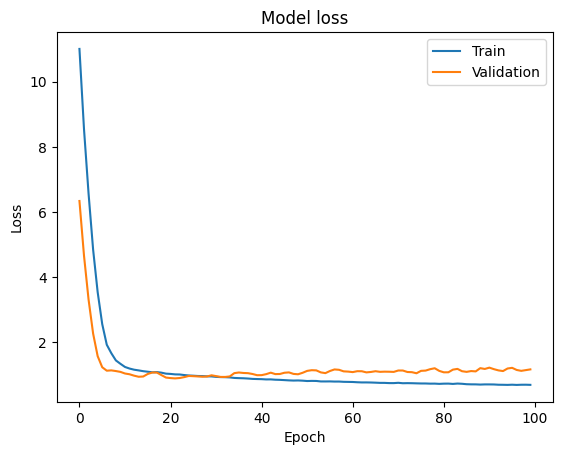

In [2]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---

# Early Stopping of Epochs

Epoch 1/100


/home/tk-lpt-648/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 11.1746 - val_loss: 6.9785
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9421 - val_loss: 5.2609
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0134 - val_loss: 3.8286
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5995 - val_loss: 2.6421
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7278 - val_loss: 1.7709
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6162 - val_loss: 1.3018
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8623 - val_loss: 1.2054
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7660 - val_loss: 1.3248
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4265 - val_loss: 1.4859
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5292 - val_loss: 1.5128
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4220 - val_loss: 1.3749
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2229 - val_loss: 1.1961
Epoch 13/1

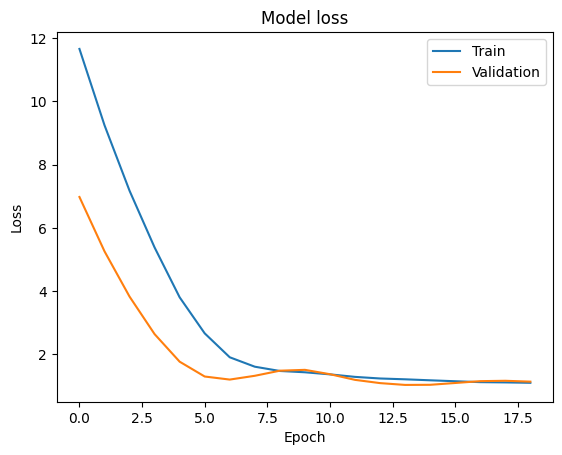

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5) # Stop training if no improvement after 5 epochs - it will monitor the validation loss by default
# If you want to monitor the training loss, you can set `monitor='loss'` in EarlyStopping
# If you want to monitor the validation loss, you can set `monitor='val_loss'` in EarlyStopping

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test), # to monitor validation loss
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# SGD Optimizer and Learning Rate Scheduler

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8643 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.6016 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3833 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5793 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8252 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9144 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3447 - learning_rate: 0.0010
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0124 - learning_rate: 0.0010
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2090 - learning_rate: 0.0010
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0058 - learning_rate: 0.0010
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7351 - learning_rate: 0.0010
Epoch 12/100
7/7 ━━━━━━━━━━

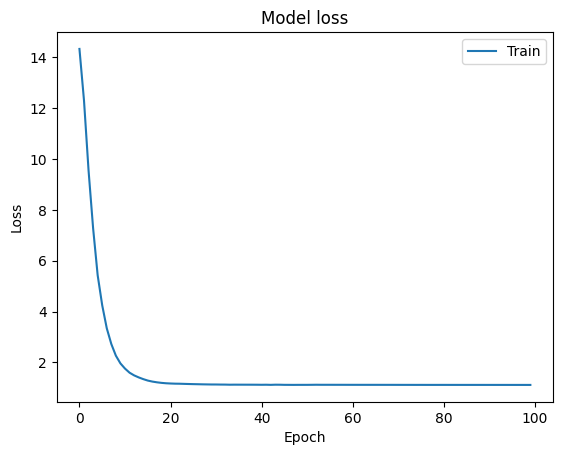

In [16]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),
              loss='mean_squared_error')

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    else:
        return 0.001
    
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    callbacks=[scheduler])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

y_pred = model.predict(X_test)  # Predicting the samples in the test set
print("PREDICTION: ")
print(y_pred[:5].flatten())


# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [9]:
model.layers

[<Dense name=dense_12, built=True>]

In [13]:
# weights and bias of first Dense layer
w, b = model.layers[0].get_weights()
w, b

(array([[ 0.8419713 ],
        [ 0.21664812],
        [ 0.00838804],
        [ 0.09584974],
        [ 0.16006199],
        [ 0.3403389 ],
        [ 0.38986734],
        [-0.31994733]], dtype=float32),
 array([3.104876], dtype=float32))

# Save and load a Model

In [19]:
model.save('./models_saved/tips_model.keras')  # Saving the model

In [21]:
leaded_model = tf.keras.models.load_model('./models_saved/tips_model.keras')  # Loading the model
leaded_model.predict(X_test[:5])  # Predicting the samples in the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[2.8585718],
       [2.0274796],
       [4.011583 ],
       [3.8196285],
       [2.2074864]], dtype=float32)